<h1><center><b>Actividad 3: CNN con Keras</b></h1></center>


<h4><center> Manuel Julio Romero Olvera &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A01752662  </h4></center>

<h4><center> Cristian Gonzaga López &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  A01745134 </h4></center>

## CNN classifier for the MNIST dataset
This example is based on the material from the  coursera course of The Imperial College on london for Tensorflow 2 available at https://www.coursera.org/learn/getting-started-with-tensor-flow2


In [ ]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages.

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Convolution Layers

Of course, when working with Keras to build a CNN, we do not need to define our filters manually, nor apply the convolution operations. Instead we can simply use `keras.layers.Conv2D` to define a convolution layer that can be trained as part of a CNN.

```
keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")
```
In the above example we define a convolution layer with 32 learnable filters, each of size $3\times3$, with a stride of 1 and using `same` (zero) padding (alternatively, we could use `"valid"` if we don't want to use padding).

Documentation: 

https://keras.io/api/layers/convolution_layers/convolution2d/


# Pooling Layers

To define a pooling layer we can use keras' `keras.layers.MaxPool2D` or `keras.layers.AvgPool2D`.

```
keras.layers.MaxPool2D(pool_size=2)
```

In the above example, the stride defaults to the kernel size.

Documentation:

https://keras.io/api/layers/pooling_layers/max_pooling2d/
https://keras.io/api/layers/pooling_layers/average_pooling2d/


# Building a CNN

Complete the required functions to build a CNN to classify MNIST images.


### The MNIST dataset

In this practice excercise, you will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

#### Load and preprocess the data

In [ ]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11490434/11490434 [==============================] - 1s 0us/step


First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1 instead of 0 to 255.

In [ ]:
def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    scaled_train_images = train_images / 255
    scaled_test_images = test_images / 255

    return  (scaled_train_images,scaled_test_images)
    

In [ ]:
# Run your function on the input data
sd_train_images,sd_test_images = scale_mnist_data(train_images, test_images)

In [ ]:
# Check the shape of the dataset
print("Scaled train images",sd_train_images.shape)
print("Scaled test images",sd_test_images.shape)

Scaled train images (60000, 28, 28)
Scaled test images (10000, 28, 28)


Notice the sample images have a rank 2 shape, however convolution layers expect a 3-dimensional input (width x height x depth).

In [ ]:
# Add a dummy channel dimension to the test and train set
# The resulting shapes should be (60000, 28, 28, 1) and (10000, 28, 28, 1)
scaled_train_images = sd_train_images[...,np.newaxis]
scaled_test_images = sd_test_images[...,np.newaxis]

In [ ]:
print("Scaled train images",scaled_train_images.shape)
print("Scaled test images",scaled_test_images.shape)

Scaled train images (60000, 28, 28, 1)
Scaled test images (10000, 28, 28, 1)


#### Build the convolutional neural network model

We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have six layers.

In [ ]:
def get_model(input_shape_):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model  =  Sequential([
        # A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. 
        # Make sure to provide the `input_shape` keyword argument in this first layer.
        Conv2D(8, kernel_size=3, padding='same', activation="relu", input_shape=input_shape_),

        # A max pooling layer, with a 2x2 window, and default strides.
        MaxPooling2D(2), # Se reduce el tamaño de la imagen a la mitad.

        # A flatten layer, which unrolls the input into a one-dimensional tensor.
        Flatten(),

        # Two dense hidden layers, each with 64 units and ReLU activation functions.
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),

        # A dense output layer with 10 units and the softmax activation function.
        Dense(10, activation='softmax')
        ])
    

    return model
    

In [ ]:
model = get_model(scaled_train_images[0].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                100416    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

Your model should look like this:
```
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                100416    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
=================================================================
Total params: 105,306
Trainable params: 105,306
Non-trainable params: 0
```

#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [ ]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    opt = tf.keras.optimizers.Adam() # Adam optimiser (with default settings)
    #acc = tf.keras.metrics.SparseCategoricalAccuracy() 
    
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    

In [ ]:
compile_model(model)

#### Fit the model to the training data

Now you should train the model on the MNIST dataset, using the model's `fit` method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [ ]:
def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels
    with 10% used as a validation set. 
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(scaled_train_images, train_labels, validation_split=0.1, epochs=5)
    return history

In [ ]:
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1688/1688 [==============================] - 15s 4ms/step - loss: 0.2274 - accuracy: 0.9333 - val_loss: 0.0782 - val_accuracy: 0.9782
Epoch 2/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0764 - accuracy: 0.9764 - val_loss: 0.0655 - val_accuracy: 0.9837
Epoch 3/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0556 - val_accuracy: 0.9857
Epoch 4/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.0534 - val_accuracy: 0.9862
Epoch 5/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0564 - val_accuracy: 0.9853


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [ ]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)
frame

,loss,accuracy,val_loss,val_accuracy
0,0.227433,0.933296,0.078220,0.978167
1,0.076397,0.976370,0.065546,0.983667
2,0.053968,0.983056,0.055555,0.985667
3,0.040321,0.986722,0.053389,0.986167
4,0.030311,0.990426,0.056363,0.985333


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

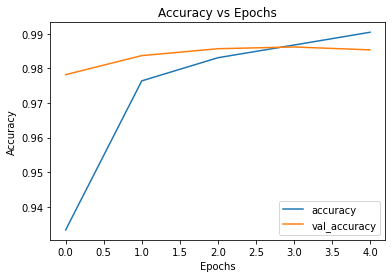

In [ ]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y=["accuracy", "val_accuracy"], title="Accuracy vs Epochs", legend=True)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

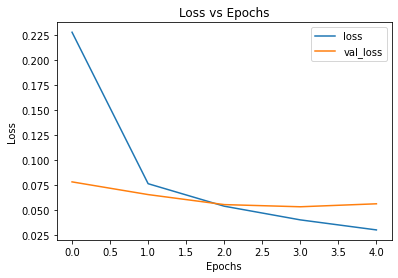

In [ ]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y=["loss", "val_loss"], title = "Loss vs Epochs", legend=True)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [ ]:
def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels)

    return (test_loss,test_accuracy)
    

In [ ]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0503 - accuracy: 0.9833
Test loss: 0.05025707185268402
Test accuracy: 0.983299970626831


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

1/1 [==============================] - 0s 114ms/step


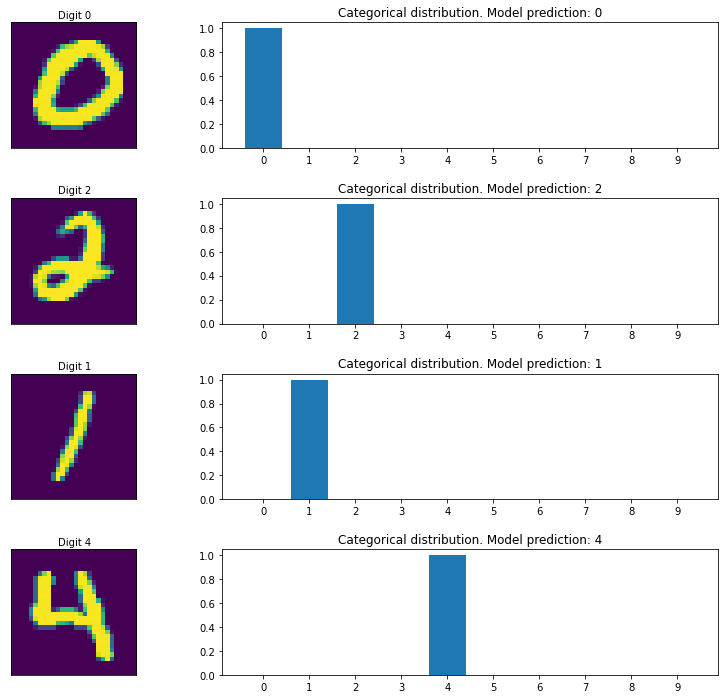

In [ ]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()